In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime 

In [2]:
url_template = 'https://geo-python.github.io/2017/_static/data/L7/1924927457196dat.txt'

In [3]:
df = pd.read_csv(url_template, sep='\s+', parse_dates=['YR--MODAHRMN'], na_values=['*','**','***','****','*****','******'])
df.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29750,99999,2012-01-01 00:50:00,280.0,3,NaN,89.0,BKN,NaN,NaN,...,NaN,29.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29750,99999,2012-01-01 01:50:00,310.0,3,NaN,89.0,OVC,NaN,NaN,...,NaN,29.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29750,99999,2012-01-01 02:50:00,280.0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,29.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29750,99999,2012-01-01 03:50:00,200.0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,29.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29750,99999,2012-01-01 04:50:00,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,29.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Selection des données qui nous intéresse
select_cols = ['YR--MODAHRMN', 'TEMP', 'SPD']
df = df[select_cols]
df.head()

,YR--MODAHRMN,TEMP,SPD
0,2012-01-01 00:50:00,28.0,3
1,2012-01-01 01:50:00,27.0,3
2,2012-01-01 02:50:00,25.0,1
3,2012-01-01 03:50:00,21.0,1
4,2012-01-01 04:50:00,21.0,0


In [5]:
#renommer des colonnes
name_conversion = {'YR--MODAHRMN':'TIME', 'SPD':'Speed' }
df = df.rename(columns=name_conversion)
df.head()

,TIME,TEMP,Speed
0,2012-01-01 00:50:00,28.0,3
1,2012-01-01 01:50:00,27.0,3
2,2012-01-01 02:50:00,25.0,1
3,2012-01-01 03:50:00,21.0,1
4,2012-01-01 04:50:00,21.0,0


In [6]:
#ajouter une colonne 'Celsius' qui contient les températures converties en celsius
df['Celsius']=(df['TEMP']-32)/1.8
df.head()

,TIME,TEMP,Speed,Celsius
0,2012-01-01 00:50:00,28.0,3,-2.222222
1,2012-01-01 01:50:00,27.0,3,-2.777778
2,2012-01-01 02:50:00,25.0,1,-3.888889
3,2012-01-01 03:50:00,21.0,1,-6.111111
4,2012-01-01 04:50:00,21.0,0,-6.111111


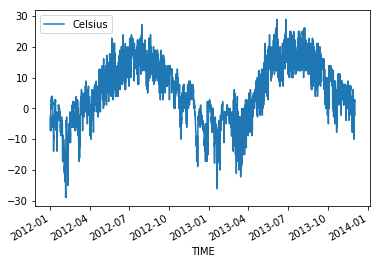

In [7]:
#ploter la température en fonction du 'TIME'
df.plot(x='TIME', y='Celsius')
#plt.savefig("temp_plot1.png", dpi=300)

In [8]:
#transformer une colonne quelconque en index
df = df.set_index('TIME')
df.head()

,TEMP,Speed,Celsius
TIME,,,
2012-01-01 00:50:00,28.0,3,-2.222222
2012-01-01 01:50:00,27.0,3,-2.777778
2012-01-01 02:50:00,25.0,1,-3.888889
2012-01-01 03:50:00,21.0,1,-6.111111
2012-01-01 04:50:00,21.0,0,-6.111111


In [9]:
first_jan = df['2013-01-01':'2013-01-01']
first_jan

,TEMP,Speed,Celsius
TIME,,,
2013-01-01 00:50:00,34.0,13,1.111111
2013-01-01 01:50:00,36.0,10,2.222222
2013-01-01 02:50:00,36.0,10,2.222222
2013-01-01 03:50:00,37.0,11,2.777778
2013-01-01 04:50:00,37.0,13,2.777778
2013-01-01 05:50:00,37.0,13,2.777778
2013-01-01 06:50:00,37.0,11,2.777778
2013-01-01 07:50:00,37.0,13,2.777778
2013-01-01 08:50:00,37.0,11,2.777778


In [10]:
first_jan_12 = df['2013-01-01 00:00':'2013-01-01 15:00']
first_jan_12

,TEMP,Speed,Celsius
TIME,,,
2013-01-01 00:50:00,34.0,13,1.111111
2013-01-01 01:50:00,36.0,10,2.222222
2013-01-01 02:50:00,36.0,10,2.222222
2013-01-01 03:50:00,37.0,11,2.777778
2013-01-01 04:50:00,37.0,13,2.777778
2013-01-01 05:50:00,37.0,13,2.777778
2013-01-01 06:50:00,37.0,11,2.777778
2013-01-01 07:50:00,37.0,13,2.777778
2013-01-01 08:50:00,37.0,11,2.777778


In [11]:
#Calcul de la moyenne des températures observées sur la journée
daily = df.resample(rule = 'D').mean()
daily.head()

,TEMP,Speed,Celsius
TIME,,,
2012-01-01,25.250000,3.791667,-3.750000
2012-01-02,33.130435,14.739130,0.628019
2012-01-03,37.333333,6.333333,2.962963
2012-01-04,37.041667,16.041667,2.800926
2012-01-05,36.583333,8.541667,2.546296


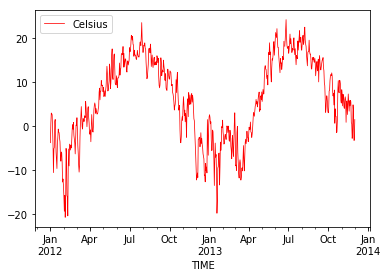

In [12]:
daily.plot(x=None, y='Celsius', kind='line', lw=0.75, c='r')
#daily.plot(x=daily.index, y='Celsius', kind='line', lw=0.75, c='g')

In [18]:
#pour enregistrer la figure
plt.savefig("temp_plot1.png", dpi=300)

<Figure size 432x288 with 0 Axes>

In [16]:
plt.style.use('seaborn-whitegrid')

In [19]:
winter = daily['2012-12-01' : '2013-02-28']
spring = daily['2013-03-01' : '2013-05-31']
summer = daily['2013-06-01' : '2013-08-31']
fall = daily['2013-09-01' : '2013-11-30']

In [21]:
winter.head()

,TEMP,Speed,Celsius
TIME,,,
2012-12-01,15.500000,6.083333,-9.166667
2012-12-02,10.041667,3.416667,-12.199074
2012-12-03,11.125000,3.791667,-11.597222
2012-12-04,12.875000,5.750000,-10.625000
2012-12-05,11.083333,3.791667,-11.620370


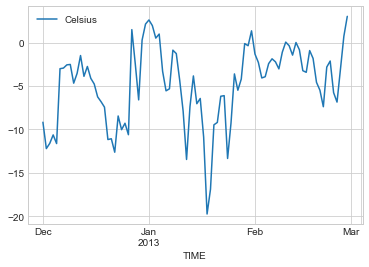

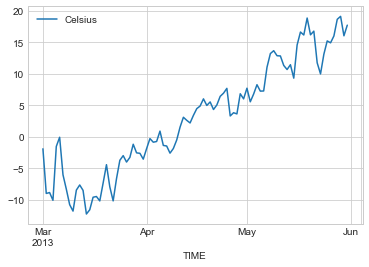

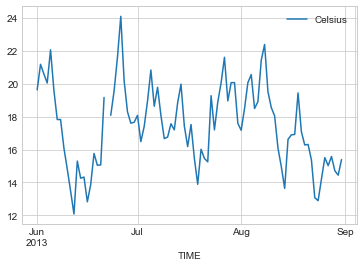

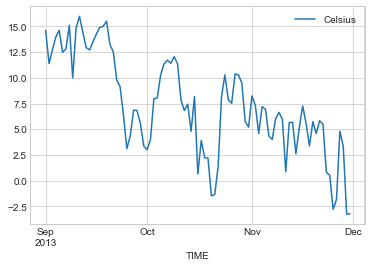

In [31]:
winter.plot(x=None, y='Celsius'),
spring.plot(x=None, y='Celsius'),
summer.plot(x=None, y='Celsius'),
fall.plot(x=None, y='Celsius')